In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
df["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [6]:
df.duplicated().sum()

240

In [7]:
df["quality"]=df["quality"].map({5:1,6:2,7:3,4:4,8:5,3:6})
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,2
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1


In [8]:
df["quality"].value_counts()

quality
1    681
2    638
3    199
4     53
5     18
6     10
Name: count, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [38]:
x=df.drop(columns=["quality"])
y=df["quality"]

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [42]:
scaler=StandardScaler()
scaler

StandardScaler()

In [44]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [46]:
k=5

In [48]:
knn=KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [50]:
y_pred=knn.predict(x_test)
y_pred

array([1, 1, 2, 1, 1, 2, 1, 1, 3, 1, 1, 1, 3, 1, 2, 2, 2, 2, 1, 1, 1, 1,
       2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 3, 1, 1, 2,
       1, 1, 2, 3, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2, 1, 1, 2, 2, 1, 1, 2, 3,
       4, 3, 1, 2, 1, 1, 2, 1, 2, 1, 3, 1, 3, 2, 2, 1, 1, 2, 1, 1, 2, 2,
       2, 1, 2, 1, 2, 3, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 3, 2, 1, 2, 1,
       2, 1, 3, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 3, 2, 2, 1, 1, 3, 2, 1, 1,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 3, 2, 1, 1, 1, 2, 1, 2, 1, 2,
       2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 3, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2,
       2, 3, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 3, 1, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 3,
       2, 2, 2, 1, 2, 2, 2, 1, 3, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 3,
       2, 2, 2, 1, 1, 1, 1, 1, 2, 3, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 3,
       2, 2, 1, 2, 1, 3, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 3, 1, 2, 1, 1, 2,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1,

In [52]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print("\n Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy: 0.625

 Confusion Matrix:
 [[100  34   1   1   0   0]
 [ 38  82   8   0   0   0]
 [  9  13  18   0   0   0]
 [  6   4   1   0   0   0]
 [  0   1   2   0   0   0]
 [  2   0   0   0   0   0]]


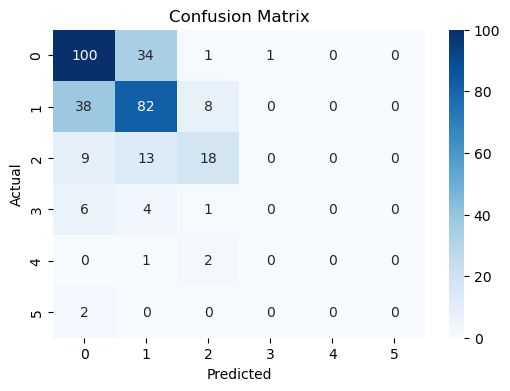

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues',fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

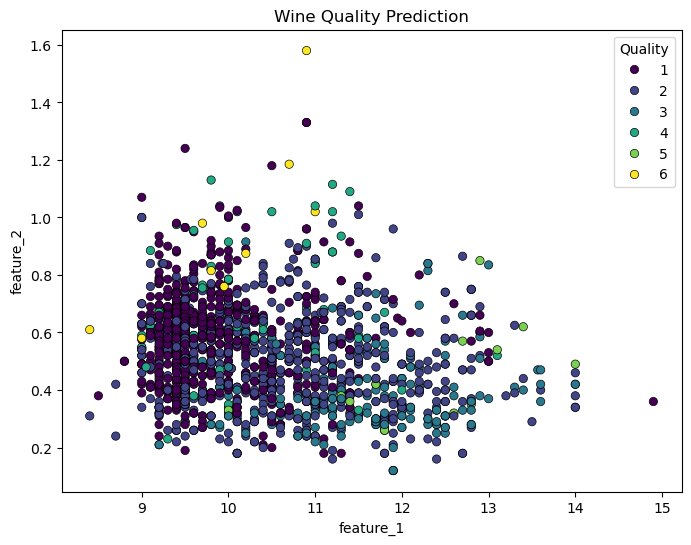

In [59]:
f1="alcohol"
f2="volatile acidity"
plt.figure(figsize=(8,6))
sns.scatterplot(x=df[f1],y=df[f2],hue=df['quality'],palette='viridis',edgecolor='k')
plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.title("Wine Quality Prediction")
plt.legend(title="Quality")
plt.show()